#Difusion en Reactor Tubular
J. Camilo Alfonso R., Carlos M. Patiño

In [233]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots

Populating the interactive namespace from numpy and matplotlib


Las ecuaciones que corresponden al reactor son:
$$c_t=-u(r)c_z+D(c_{zz}+c_{rr}+\frac{1}{r}c_r)-r(c,T)$$
$$T_t=-u(r)T_z+\frac{\lambda}{\rho c_p}(T_{zz}+T_{rr}+\frac{1}{r}T_r)+\frac{-\Delta H}{\rho c_p}r(c,t)$$

## En el centro del reactor
$$r=0$$
$$u(r=0)=u_{max}\left(1-\left(\frac{0}{R}\right)^2\right)=u_{max}$$
Los siguientes terminos se puede recalcular usando el teorema de L'Hopital
$$\lim_{r\rightarrow0}{\frac{c_r}{r}=\frac{0}{0}}\rightarrow \lim_{r\rightarrow0}{\frac{c_r}{r}}=\lim_{r\rightarrow0}{\frac{\delta c_r/ \delta r}{\delta r/ \delta r}}=c_r$$
$$\lim_{r\rightarrow0}{\frac{T_r}{r}=\frac{0}{0}}\rightarrow \lim_{r\rightarrow0}{\frac{T_r}{r}}=\lim_{r\rightarrow0}{\frac{\delta T_r/ \delta r}{\delta r/ \delta r}}=T_r$$


Asi, se obtienen las ecuaciones:
$$c_t(r=0)=-u_{max}c_z+D(c_{zz}+2c_{rr}+)-r(c,T)$$
$$T_t(r=0)=-u_{max}T_z+\frac{\lambda}{\rho c_p}(T_{zz}+2T_{rr}+)+\frac{-\Delta H}{\rho c_p}r(c,t)$$

## Planteamiento Diferencias Finitas
Las ecuaciones que corresponden al reactor son:
$$c_t=-u(r)c_z+D(c_{zz}+c_{rr}+\frac{1}{r}c_r)-r(c,T)$$
$$T_t=-u(r)T_z+\frac{\lambda}{\rho c_p}(T_{zz}+T_{rr}+\frac{1}{r}T_r)+\frac{-\Delta H}{\rho c_p}r(c,t)$$

Sabiendo que las derivadas se pueden discretizar de la forma:
$$u_{i,j}^{n}=u(t=n,z=i,r=j)$$
$$\frac{\delta u}{\delta t} = \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}$$
$$\frac{\delta^2u}{\delta x^2}=\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}$$

####Esquema Explicito
Se logra obtener el esquema explicito para $c_{i,j}^{n+1}$ y $T_{i,j}^{n+1}$
$$c_{i,j}^{n+1} = c_{i,j}^{n} -\frac{\Delta t}{\Delta z}u(r)(c_{i+1,j}^{n}-c_{i,j}^{n}) + D\Delta t \left(\frac{c_{i+1,j}^{n}-2c_{i,j}^{n}+c_{i-1,j}^{n}}{\Delta z^2} + \frac{c_{i,j+1}^{n}-2c_{i,j}^{n}+c_{i,j-1}^{n}}{\Delta r^2} + \frac{c_{i,j+1}^{n}-c_{i,j}^{n}}{r\Delta r}\right)-r\left(c_{i,j}^{n},T_{i,j}^{n}\right)$$

$$T_{i,j}^{n+1} = T_{i,j}^{n} -\frac{\Delta t}{\Delta z}u(r)(T_{i+1,j}^{n}-T_{i,j}^{n}) + \Delta t\frac{\lambda}{\rho c_p} \left(\frac{T_{i+1,j}^{n}-2T_{i,j}^{n}+T_{i-1,j}^{n}}{\Delta z^2} + \frac{T_{i,j+1}^{n}-2T_{i,j}^{n}+T_{i,j-1}^{n}}{\Delta r^2} + \frac{T_{i,j+1}^{n}-T_{i,j}^{n}}{r\Delta r}\right)+\Delta t\frac{-\Delta H}{\rho c_p}r\left(c_{i,j}^{n},T_{i,j}^{n}\right)$$

####Descripcion del sistema
Condiciones iniciales
$$c(z,r,0)=c_0(z,r)$$
$$T(z,r,0)=T_0(z,r)$$

Simetria Radial sin Transferencia de Masa
$$c_r(z,0,t)=\frac{c_{i,0+1}^{n}-c_{i,0}^{n}}{\Delta r}=0$$
$$\rightarrow c_{i,0}^{n}=c_{i,1}^{n}$$

$$T_r(z,0,t)=\frac{T_{j,0+1}^{n}-T_{j,0}^{n}}{\Delta r}=0$$
$$\rightarrow T_{j,0}^{n}=T_{j,1}^{n}$$

$$c_r(z,R,t)=\frac{c_{j,R}^{n}-c_{j,R-1}^{n}}{\Delta r}=0$$
$$\rightarrow c_{j,R}^{n}=c_{j,R-1}^{n}$$

Intercambio termico con la pared
$$T_r(z,R,t)=\frac{T_{j,R}^{n}-T_{j,R-1}^{n}}{\Delta r}=\frac{h}{\lambda}(T_w-T(z,R,t))$$
$$\rightarrow T_{i,R}^{n}=T_{i,R-1}^{n}+\Delta r \frac{h}{\lambda}(T_w-T_{i,R}^{n})$$

Concentracion y Temperatura constantes al **inicio** del tubo
$$c(0,r,t)=c_{0,j}^{n}=c_{in}$$
$$T(0,r,t)=T_{0,j}^{n}=T_{in}$$

Difusion cero a la salida
$$c_z(L,r,t)=\frac{c_{L,r}^{n}-c_{L-1,r}^{n}}{\Delta z}=0$$
$$\rightarrow c_{L,r}^{n} = c_{L-1,r}^{n}$$

$$T_z(L,r,t)=\frac{T_{L,i}^{n}-T_{L-1,i}^{n}}{\Delta z}=0$$
$$\rightarrow T_{L,r}^{n} = T_{L-1,r}^{n}$$

##Implementacion Diferencias Finitas
###Definir Parametros del problema

In [270]:
# Parametros (Unidades en Sistema internacional)
T_in = 20+273  # Temperatura a la entrada del Reactor
c_in = 0.5     # Concentracion a la entrada

h = 1   # Intercambio termico en la pared
h2 = 1  #
T_w = 100 #

D = 1 # 
rho = 1000 # Densidad del fluido (Agua)
c_p = 4181.3 # Calor especifico del agua a 298 °K [J/gK]

Delta_H = -1*1.0; # Entalpia de la reaccion
u_max = 1; # Velocidad maxima del fluido
R = 1;     # Radio Maximo

n_t = 100 # Numero de pasos en el tiempo
t_f = 1  # tiempo final
t = linspace(0,t_f,n_t) # vector de tiempo
d_t = t[1]-t[0] # paso de tiempo
# Falta tener en cuenta las condiciones de convergencia ***

n_r = 10
r = linspace(1e-2,R,n_r) # El radio solo se evalua en la parte psotiva porque el comportamiento de las funciones respecto 
                        # al radio es simetrico
d_r = r[1] - r[0]

n_z = 50
L = 30 # Longitud del tubo
z = linspace(0,L,n_z)
d_z = z[1]-z[0]

k0 = 10 # parametro
E = 10 # parametro

zz,rr = meshgrid(z,r,sparse=False) # Malla

###Funciones

In [309]:
def U_(r):
    # Velocidad en funcion del radio
    return u_max*(1-(r/R)**2)
#Verificar funcion u(r)
#r = linspace(-R,R,20)
#plot(r,U_(r))
# Funcion Verificada!

def F_r(c,T):
    return k0*exp(-E/(R*T))*c**2
    # Verificar si el 'R' de la ecuacion es el R_max del tubo o si es R constante de los gases

#Tener cuidado con el tamaño de los arreglos rr y zz
def c_t0(z,r):
    return zeros(shape(z)) # Condicion en tiempo 0
    return z/10+r**2

def T_t0(z,r):
    return zeros(shape(z))
    #return z/10+0.5*r**3

In [310]:
def solver(nt,zz,rr):
    # c,T = solver(nt)
    # Resuelve ecuaciones de concentracion c y temperatura T para el reactor
    # discretizado en posiciones zz y rr 
    #
    c = c_t0(zz,rr)
    T = T_t0(zz,rr)
    
    for i in range(nt+1):
        cn = c.copy()
        Tn = T.copy()

        # Los valores de los bordes se calculan con condiciones de frontera
        c0 = cn[1:-1,1:-1]
        c1 = -d_t/d_z*U_(rr[1:-1,1:-1])*(cn[1:-1,2:] - cn[1:-1,1:-1])
        c2 = (cn[1:-1,2:] - 2*cn[1:-1,1:-1] + cn[1:-1,0:-2])/d_z**2
        c3 = (cn[2:,1:-1] - 2*cn[1:-1,1:-1] + cn[0:-2,1:-1])/d_r**2
        c4 = (cn[2:,1:-1] - cn[1:-1,1:-1])/(d_r*rr[1:-1,1:-1])
        c5 = -F_r(cn[1:-1,1:-1], Tn[1:-1,1:-1])
        c[1:-1,1:-1] = c0 + c1 + D*d_t*(c2+c3+c4) + c5

        # Los valores de los bordes se calculan con condiciones de frontera
        T0 = Tn[1:-1,1:-1]
        T1 = -d_t/d_z*U_(rr[1:-1,1:-1])*(Tn[1:-1,2:] - Tn[1:-1,1:-1])
        T2 = (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,0:-2])/d_z**2
        T3 = (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[0:-2,1:-1])/d_r**2
        T4 = (Tn[2:,1:-1] - Tn[1:-1,1:-1])/(d_r*rr[1:-1,1:-1])
        T5 = d_t*Delta_H/(rho*c_p)*F_r(cn[1:-1,1:-1], Tn[1:-1,1:-1])
        T[1:-1,1:-1] = T0 + T1 + d_t*h2/(rho*c_p)*(T2+T3+T4) + T5

        # Aplicar Condiciones de Frontera
        # Simetria Radial sin transferencia de Masa
        c[0,:] = c[1,:]
        T[0,:] = T[1,:]
        c[-1,:] = c[-2,:]
        # Intercambio Termico en la pared
        T[-1,:] = T[-2,:] + d_r*h/h2*(T_w-T[-1,:])

        # Concentracion y Temperatura constantes al inicio del tubo
        c[:,0] = c_in
        T[:,0] = T_in

        # Difusion cero a la salida
        c[:,-1] = c[:,-2]
        T[:,-1] = T[:,-2]
    return c,T

###Iplementacion

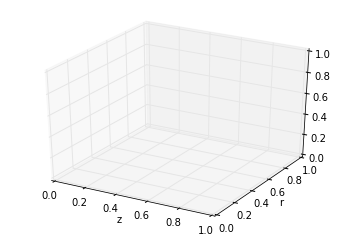

In [331]:
c_init = c_t0(zz,rr)
T_init = T_t0(zz,rr)
c_init[:,0] = c_in
T_init[:,0] = T_in
        
fig = figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zz[-1:1,-1:1],rr[-1:1,-1:1],c_init[-1:1,-1:1],
    rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=True)
xlabel('z');ylabel('r') #ax.set_zlim(1,2.5)

/home/j-camilo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide


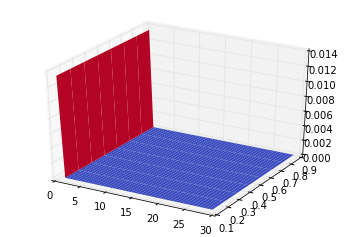

In [332]:
c,T = solver(1,zz,rr)
ax = gca(projection='3d')
ax.plot_surface(zz[1:-1,1:-1],rr[1:-1,1:-1],c[1:-1,1:-1],
    rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=True)

/home/j-camilo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide


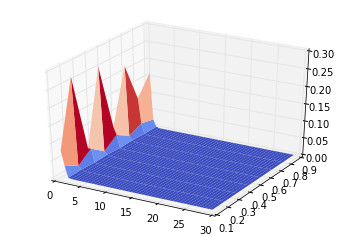

In [336]:
c,T = solver(15,zz,rr)
ax = gca(projection='3d')
ax.plot_surface(zz[1:-1,1:-1],rr[1:-1,1:-1],c[1:-1,1:-1],
    rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=True)